In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
dataset = pd.read_csv('../OR - 7.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0:1].values

In [3]:
dataset.head(5)

,Bearing,Fault Diameter,DE,FE
0,Normal,0.0,0.064254,0.038625
1,Normal,0.0,0.063002,0.096769
2,Normal,0.0,-0.004381,0.127382
3,Normal,0.0,-0.035882,0.144640
4,Normal,0.0,-0.023991,0.086702


In [4]:
#Retrieve Random Data
dataset.sample(10)

,Bearing,Fault Diameter,DE,FE
63468,Normal,0.000,-0.129967,0.047871
84105,Normal,0.000,0.026911,0.099029
144028,"Outer Race (0.007"")",0.007,-0.222536,-0.014382
230978,"Outer Race (0.007"")",0.007,2.059677,-0.080949
133737,"Outer Race (0.007"")",0.007,0.310251,-0.059787
202155,"Outer Race (0.007"")",0.007,1.827801,-0.042735
230805,"Outer Race (0.007"")",0.007,-0.166496,0.000205
232221,"Outer Race (0.007"")",0.007,0.007716,0.038420
100102,Normal,0.000,0.017524,0.119575
198812,"Outer Race (0.007"")",0.007,-0.053198,-0.090811


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
y = ct.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
classifier = Sequential()

In [11]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=3, units=3)`
  """Entry point for launching an IPython kernel.


In [12]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=3)`
  """Entry point for launching an IPython kernel.


In [13]:
classifier.add(Dense(output_dim = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=2)`
  """Entry point for launching an IPython kernel.


In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:

model = classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100)


C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
193792/193792 [==============================] - 2s 11us/step - loss: 0.1215 - accuracy: 0.9845
Epoch 2/100
193792/193792 [==============================] - 2s 10us/step - loss: 7.2088e-04 - accuracy: 1.0000 0s - loss: 8.3118e-04 - 
Epoch 3/100
193792/193792 [==============================] - 2s 10us/step - loss: 1.3299e-04 - accuracy: 1.0000
Epoch 4/100
193792/193792 [==============================] - 2s 10us/step - loss: 3.5928e-05 - accuracy: 1.0000
Epoch 5/100
193792/193792 [==============================] - 2s 9us/step - loss: 1.0972e-05 - accuracy: 1.0000
Epoch 6/100
193792/193792 [==============================] - 2s 9us/step - loss: 3.5330e-06 - accuracy: 1.0000
Epoch 7/100
193792/193792 [==============================] - 2s 10us/step - loss: 1.1697e-06 - accuracy: 1.0000
Epoch 8/100
193792/193792 [==============================] - 2s 10us/step - loss: 3.9441e-07 - accuracy: 1.0000
Epoch 9/100
193792/193792 [==============================] - 2s 10us/step - loss: 1.3

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

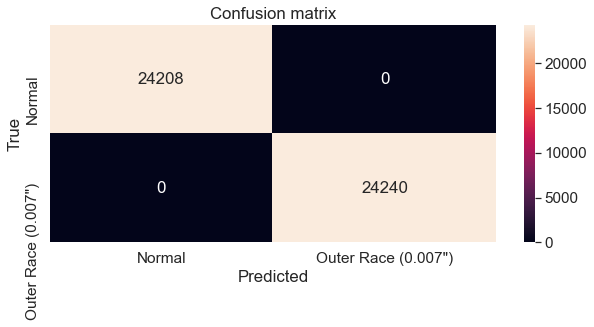

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Outer Race (0.007")']  
columns = ['Normal', 'Outer Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [18]:
classifier.evaluate(X_test, y_test)

48448/48448 [==============================] - 1s 14us/step


[5.511968262926413e-10, 1.0]

In [19]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     24208
Outer Race (0.007")       1.00      1.00      1.00     24240

          micro avg       1.00      1.00      1.00     48448
          macro avg       1.00      1.00      1.00     48448
       weighted avg       1.00      1.00      1.00     48448
        samples avg       1.00      1.00      1.00     48448

